<a href="https://colab.research.google.com/github/rfps09/Monitoria/blob/main/SemanaAcademica/SemanaAcademicaMobilePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rede neural para classificação de faixa de preço de celular

Carregando e separando os dados, em 80% para treino e 20% para teste, 10% dos 80% vão para validação

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/MobilePrice/train.csv', delimiter=',')
data = np.delete(data,0,axis=0)
classe = data[:,-1]
data = np.delete(data,-1,axis=1)

data_treino,data_teste,classe_treino,classe_teste = train_test_split(data,classe,test_size=0.2,random_state=123)
classe_treino_onehot = to_categorical(classe_treino)

Criando a rede neural

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(numInputs, numClasses):
  model = Sequential()
  model.add(Dense(numInputs,activation='elu',input_dim=numInputs))
  model.add(Dense(50,activation='elu'))
  model.add(Dense(50,activation='elu'))
  model.add(Dense(50,activation='elu'))
  model.add(Dense(50,activation='elu'))
  model.add(Dense(numClasses, activation='softmax'))
  model.compile('Adam', 'categorical_crossentropy', metrics=['categorical_accuracy'])
  return model

model = create_model(20,4)

history = model.fit(data_treino,classe_treino_onehot, validation_split=0.1, epochs=500)

Epoch 1/500
45/45 [==============================] - 1s 7ms/step - loss: 6.0069 - categorical_accuracy: 0.4576 - val_loss: 2.6844 - val_categorical_accuracy: 0.4313
Epoch 2/500
45/45 [==============================] - 0s 3ms/step - loss: 1.8148 - categorical_accuracy: 0.5368 - val_loss: 2.9131 - val_categorical_accuracy: 0.4375
Epoch 3/500
45/45 [==============================] - 0s 4ms/step - loss: 1.6022 - categorical_accuracy: 0.5500 - val_loss: 1.8342 - val_categorical_accuracy: 0.5437
Epoch 4/500
45/45 [==============================] - 0s 4ms/step - loss: 1.6206 - categorical_accuracy: 0.5583 - val_loss: 2.1206 - val_categorical_accuracy: 0.5437
Epoch 5/500
45/45 [==============================] - 0s 4ms/step - loss: 1.2709 - categorical_accuracy: 0.5979 - val_loss: 2.2153 - val_categorical_accuracy: 0.5938
Epoch 6/500
45/45 [==============================] - 0s 3ms/step - loss: 0.9632 - categorical_accuracy: 0.6208 - val_loss: 1.5232 - val_categorical_accuracy: 0.5437
Epoch 7/50

Modelo da rede neural

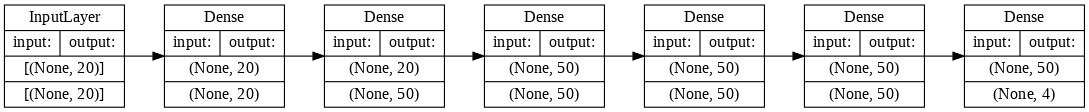

In [91]:
from tensorflow.keras.utils import plot_model

plot_model(model,
          show_shapes=True,
          show_layer_names=False,
          rankdir="LR",
          dpi=80)

Gráficos

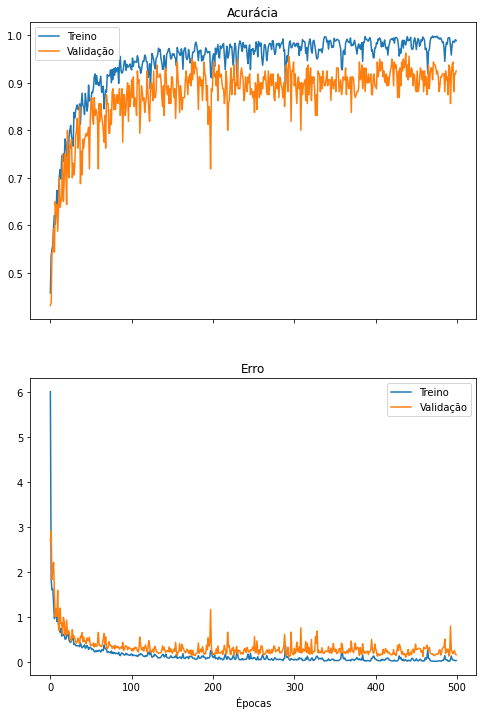

In [92]:
import matplotlib.pyplot as plt

def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_categorical_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)

Testando a rede neural

In [93]:
classe_predita_onehot = model.predict(data_teste)
classe_predita = classe_predita_onehot.argmax(axis=1)

Matriz de confusão

In [94]:
#Matriz de confusão já com 3 classes:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

matriz_confusao = confusion_matrix(classe_teste, classe_predita, labels=range(4))
print(matriz_confusao)

[[ 80   7   0   0]
 [  4  92   4   0]
 [  0   4 106   6]
 [  0   0   4  93]]


Métricas

In [95]:
#https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

print('Precision or positive predictive: %.3f' % precision_score(classe_teste,classe_predita,average='weighted',zero_division=1))
print('Recall or Sensitivity: %.3f' % recall_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Accuracy: %.3f' % accuracy_score(classe_teste, classe_predita))
print('F1 Score: %.3f' % f1_score(classe_teste, classe_predita,average='weighted',zero_division=1))
print('Precision Recall F1-Score Support for each class:')
#print(precision_recall_fscore_support(lista_classes_originais, lista_classes_preditas,average='weighted',labels=[0,1,2,3]))
precision, recall, fscore, support = precision_recall_fscore_support(classe_teste, classe_predita,
    zero_division=1)
print('precision or positive predictive: {}'.format(precision))
print('recall or sensitivity: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#The diagonal entries are the accuracies of each class
matriz_confusao = matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis]
acuracia_classes = matriz_confusao.diagonal()
print('Accuracy for each class:')
print(acuracia_classes)

print(classification_report(classe_teste, classe_predita, zero_division=1))

Precision or positive predictive: 0.928
Recall or Sensitivity: 0.927
Accuracy: 0.927
F1 Score: 0.928
Precision Recall F1-Score Support for each class:
precision or positive predictive: [0.95238095 0.89320388 0.92982456 0.93939394]
recall or sensitivity: [0.91954023 0.92       0.9137931  0.95876289]
fscore: [0.93567251 0.90640394 0.92173913 0.94897959]
support: [ 87 100 116  97]
Accuracy for each class:
[0.91954023 0.92       0.9137931  0.95876289]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94        87
         1.0       0.89      0.92      0.91       100
         2.0       0.93      0.91      0.92       116
         3.0       0.94      0.96      0.95        97

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

